#### Author: Roberto Mendoza
#### Analyzing RCT reemployment experiment

Data
In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI).

In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data.

In [ ]:
import Pkg


Pkg.add("DataFrames")
Pkg.add("FilePaths")
Pkg.add("Queryverse")
Pkg.add("GLM")
Pkg.add("StatsModels")
Pkg.add("Combinatorics")
Pkg.add("Iterators")
Pkg.add("CategoricalArrays")
Pkg.add("HypothesisTests")


In [ ]:
Pkg.add("StatsBase")
Pkg.add("Lasso")
Pkg.add("TypedTables")
Pkg.add("MacroTools")
Pkg.add("NamedArrays")
Pkg.add("DataTables")
Pkg.add("Latexify")
Pkg.add("PrettyTables")
Pkg.add("TypedTables")
Pkg.add("TexTables")
Pkg.add("StatsModels")


In [ ]:
Pkg.add("DataTables")
Pkg.add("FilePaths")
Pkg.add("Combinatorics")
Pkg.add("CategoricalArrays")
Pkg.add("TypedTables")
Pkg.add("MacroTools")

In [2]:
using GLM, StatsModels
using DataTables
using DelimitedFiles, DataFrames, Lasso
using FilePaths
using HypothesisTests
using HDMjl
using Plots


Precompiling GLM
  ? StatsFuns
  ✓ QuadGK
  ? StatsModels
  ? Distributions
        Info Given GLM was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? GLM
  1 dependency successfully precompiled in 8 seconds. 42 already precompiled.
  4 dependencies failed but may be precompilable after restarting julia
  4 dependencies had output during precompilation:
┌ StatsModels
│  WARNING: Method definition (::Type{Base.MPFR.BigFloat})(Base.Irrational{:twoπ}) in module IrrationalConstants at irrationals.jl:223 overwritten in module StatsFuns on the same line (check for duplicate calls to `include`).
│  ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
└  
┌ StatsFuns
│  WARNING: Method definition (::Type{Base.MPFR.BigFloat})(Base.Irrational{:twoπ}) in module IrrationalConstants at ir

In [3]:
using StatsModels, Combinatorics
using CategoricalArrays
using StatsBase, Statistics
using TypedTables
using MacroTools
using NamedArrays
using PrettyTables # Dataframe or Datatable to latex
using TexTables # pretty regression table and tex outcome

Precompiling NamedArrays
  ✓ NamedArrays
  1 dependency successfully precompiled in 2 seconds. 13 already precompiled.
Precompiling TexTables
  ? StatsFuns
  ? Distributions
  ? StatsModels
  ? GLM
        Info Given TexTables was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? TexTables
[ Info: Precompiling TexTables [ebf5ac4f-3ec1-555f-9ac9-3d72ed88c471]
┌ Warning: Module Distributions with build ID ffffffff-ffff-ffff-0000-623023e525aa is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing TexTables [ebf5ac4f-3ec1-555f-9ac9-3d72ed88c471].


In [5]:
using Pkg
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? StatsFuns
  ✗ BinaryProvider
  ✓ MultivariateStats
  ✓ Clustering
  ? StatsModels
  ✗ Snappy
  ✓ Plots → IJuliaExt
  ? Distributions
  ✗ Parquet
  ? GLM
  ? KernelDensity
  ✗ ParquetFiles
  ? Lasso
  ? TexTables
  ✗ Queryverse
  ? StatsPlots
  3 dependencies successfully precompiled in 25 seconds. 290 already precompiled.
  6 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
  8 dependencies failed but may be precompilable after restarting julia
  8 dependencies had output during precompilation:
┌ StatsModels
│  WARNING: Method definition (::Type{Base.MPFR.BigFloat})(Base.Irrational{:twoπ}) in module IrrationalConstants at irrationals.jl:223 overwritten in module StatsFuns on the same line (check for duplicate calls to `inclu

In [23]:

using DataFrames


In [8]:
# Loading data
using DelimitedFiles

mat, head = readdlm("../../../data/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Nothing,DataType
1,abdt,10693.6,10404.0,10691.0,10880.0,,,Float64
2,tg,2.56889,0.0,2.0,6.0,,,Float64
3,inuidur1,12.9148,1.0,10.0,52.0,,,Float64
4,inuidur2,12.1938,0.0,9.0,52.0,,,Float64
5,female,0.402142,0.0,0.0,1.0,,,Float64
6,black,0.116653,0.0,0.0,1.0,,,Float64
7,hispanic,0.0363689,0.0,0.0,1.0,,,Float64
8,othrace,0.00575002,0.0,0.0,1.0,,,Float64
9,dep,0.444045,0.0,0.0,2.0,,,Float64


In [9]:
#dimenntions of dataframe 

a = size(df,1)
b =  size(df,2)

23

In [10]:
# Filter control group and just treatment group number 2

penn = filter(row -> row[:tg] in [2,0], df)

first(penn,20)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0
2,10635.0,2.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0
3,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0
5,10754.0,2.0,20.0,20.0,1.0,0.0,0.0,0.0,0.0
6,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0
7,10845.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,0.0
8,10831.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0
9,10859.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,1.0


In [11]:
# Treatment group n°4
replace!(penn.tg, 2 => 1)


rename!(penn, "tg" => "T2")


# from float to string
penn[!,:dep] = string.(penn[!,:dep]) 

# dep varaible in categorical format 
penn[!,:dep] = categorical(penn[!,:dep])

describe(penn)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,abdt,10696.4,10404.0,10698.0,10880.0,,,Float64
2,T2,0.419924,0.0,0.0,1.0,,,Float64
3,inuidur1,13.0334,1.0,11.0,52.0,,,Float64
4,inuidur2,12.2511,0.0,10.0,52.0,,,Float64
5,female,0.400726,0.0,0.0,1.0,,,Float64
6,black,0.118817,0.0,0.0,1.0,,,Float64
7,hispanic,0.0363196,0.0,0.0,1.0,,,Float64
8,othrace,0.00518852,0.0,0.0,1.0,,,Float64
9,dep,,0.0,,2.0,3,,"CategoricalValue{String, UInt32}"


### 2.0 Carry out covariate balance check

In [ ]:
using Combinatorics

In [ ]:
using StatsModels

In [14]:
 # couples variables combinations 
combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)

# combinations without same couple
expand_exp(args, deg::ConstantTerm) =
        tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)
    
    
StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) = 
apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

In [15]:
# linear regression

reg1 = @formula(T2 ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg1 = apply_schema(reg1, schema(reg1, penn))

FormulaTerm
Response:
  T2(continuous)
Predictors:
  female(continuous)
  black(continuous)
  othrace(continuous)
  dep(DummyCoding:3→2)
  q2(continuous)
  q3(continuous)
  q4(continuous)
  q5(continuous)
  q6(continuous)
  agelt35(continuous)
  agegt54(continuous)
  durable(continuous)
  lusd(continuous)
  husd(continuous)
  female(continuous) & black(continuous)
  female(continuous) & othrace(continuous)
  female(continuous) & dep(DummyCoding:3→2)
  female(continuous) & q2(continuous)
  female(continuous) & q3(continuous)
  female(continuous) & q4(continuous)
  female(continuous) & q5(continuous)
  female(continuous) & q6(continuous)
  female(continuous) & agelt35(continuous)
  female(continuous) & agegt54(continuous)
  female(continuous) & durable(continuous)
  female(continuous) & lusd(continuous)
  female(continuous) & husd(continuous)
  black(continuous) & othrace(continuous)
  black(continuous) & dep(DummyCoding:3→2)
  black(continuous) & q2(continuous)
  black(continuous) & q3(

In [16]:
m1 = lm(reg1, penn)
table = regtable( "Covariate Balance Check" => m1) # coeficientes, standar error, squared R, N (sample size )

                   | Covariate Balance Check 
                   |           (1)           
---------------------------------------------
       (Intercept) |                0.517*** 
                   |                 (0.158) 
            female |                   0.006 
                   |                 (0.130) 
             black |                  0.100* 
                   |                 (0.060) 
           othrace |                   0.173 
                   |                 (0.301) 
          dep: 1.0 |                   0.158 
                   |                 (0.186) 
          dep: 2.0 |                  -0.193 
                   |                 (0.163) 
                q2 |                  -0.109 
                   |                 (0.159) 
                q3 |                  -0.108 
                   |                 (0.159) 
                q4 |                  -0.062 
                   |                 (0.159) 
                q5 |              

In [153]:
coef(m1)

120-element Vector{Float64}:
  0.5171341684994273
  0.005623957709040804
  0.10027898023232043
  0.1729707209413855
  0.15765666283648166
 -0.1927957580044159
 -0.1092160940386827
 -0.10756634354222445
 -0.062130192370174676
 -0.04986843655914695
 -0.2176336009731102
 -0.06434643751287968
  0.025925099174411197
  ⋮
  0.0
  0.0
  0.0
  0.032309951419758245
 -0.00919781986094122
 -0.024992395010598332
 -0.015468788769230477
  0.02868662593720696
 -0.04232104969496407
 -0.03857414137437496
  0.00932812510992459
  0.0

In [18]:
m1

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

T2 ~ 1 + female + black + othrace + dep + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + husd + female & black + female & othrace + female & dep + female & q2 + female & q3 + female & q4 + female & q5 + female & q6 + female & agelt35 + female & agegt54 + female & durable + female & lusd + female & husd + black & othrace + black & dep + black & q2 + black & q3 + black & q4 + black & q5 + black & q6 + black & agelt35 + black & agegt54 + black & durable + black & lusd + black & husd + othrace & dep + othrace & q2 + othrace & q3 + othrace & q4 + othrace & q5 + othrace & q6 + othrace & agelt35 + othrace & agegt54 + othrace & durable + othrace & lusd + othrace & husd + dep & q2 + dep & q3 + dep & q4 + dep & q5 + dep & q6 + dep & agelt35 + dep & agegt54 + dep & durable + dep & lusd + dep 

### 3.0 Model specification

In [19]:
# No adjustment (2-sample approach)

ols_cl = lm(@formula(log(inuidur1) ~ T2), penn)

table1 = regtable( "No adjustment model" => ols_cl)   # 

            | No adjustment model 
            |         (1)         
----------------------------------
(Intercept) |            2.057*** 
            |             (0.021) 
         T2 |            -0.079** 
            |             (0.032) 
----------------------------------
          N |               5,782 
      $R^2$ |               0.001 


In [20]:
# adding controls
# Omitted dummies: q1, nondurable, muld

reg2 = @formula(log(inuidur1) ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg2 = apply_schema(reg2, schema(reg2, penn))

ols_cra = lm(reg2, penn)
table2 = regtable("CRA model" => ols_cra)

                   | CRA model 
                   |    (1)    
-------------------------------
       (Intercept) |  2.447*** 
                   |   (0.381) 
                T2 |  -0.071** 
                   |   (0.032) 
            female | -0.943*** 
                   |   (0.314) 
             black | -0.508*** 
                   |   (0.146) 
           othrace |    -0.039 
                   |   (1.140) 
          dep: 1.0 |     0.280 
                   |   (0.451) 
          dep: 2.0 |     0.168 
                   |   (0.394) 
                q2 |     0.027 
                   |   (0.385) 
                q3 |    -0.354 
                   |   (0.384) 
                q4 |    -0.338 
                   |   (0.384) 
                q5 |    -0.178 
                   |   (0.383) 
                q6 |    -0.446 
                   |   (0.381) 
           agelt35 |    -0.326 
                   |   (0.326) 
           agegt54 |    -0.155 
                   |   (0.580) 
        

In [80]:
# demean function
function desv_mean(a)
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    return M
end    



# Matrix Model & demean
X = StatsModels.modelmatrix(reg1.rhs,penn)
X = desv_mean(X) # matrix format 



5782×119 Matrix{Float64}:
 -0.400726  -0.118817  -0.00518852  -0.116569  …  -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852   0.883431  …   0.945002   -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569  …  -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0

In [81]:
Matrix(hcat(X, Matrix(select(penn, [:T2])).*X))

5782×238 Matrix{Float64}:
 -0.400726  -0.118817  -0.00518852  -0.116569  …  -0.0        -0.0        0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0        -0.0        0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0        -0.0        0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852   0.883431  …   0.0        -0.0        0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0        -0.0        0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0        -0.0        0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0        -0.0        0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569  …  -0.0        -0.0        0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0

In [82]:
Y = select(penn, [:inuidur1,:T2]) # select inuidur1 y T2

X = DataFrame(hcat(X, Matrix(select(penn, [:T2])).*X))  # Joint X, (T2*X)

base = hcat(Y, X) # Joint inuidur1, T2, X y (T2*X)

base.inuidur1 = log.(base.inuidur1)  # log(inuidur1)

terms = term.(names(base)) # term.() let us to get all variables as objects

#interactive regression model

ols_ira  = lm(terms[1] ~ sum(terms[2:end]), base)


table3 = regtable("Interactive model" => ols_ira)

#terms[1] : select first variable. In this case, oucome of interest 
#sum(terms[2:end]) : independent variables as regresors in the linear regression   

            | Interactive model 
            |        (1)        
--------------------------------
(Intercept) |          2.057*** 
            |           (0.021) 
         T2 |          -0.072** 
            |           (0.032) 
         x1 |            -0.666 
            |           (0.445) 
         x2 |         -0.863*** 
            |           (0.270) 
         x3 |            -1.735 
            |           (2.173) 
         x4 |             0.036 
            |           (0.685) 
         x5 |             0.212 
            |           (0.497) 
         x6 |            -0.255 
            |           (0.527) 
         x7 |            -0.621 
            |           (0.526) 
         x8 |            -0.480 
            |           (0.526) 
         x9 |            -0.372 
            |           (0.524) 
        x10 |            -0.677 
            |           (0.521) 
        x11 |            -0.678 
            |           (0.435) 
        x12 |            -0.304 
          

In [83]:
D = DataFrame([X[:,1]])  # Treatment varaible

,x1
,Float64
1,-0.400726
2,-0.400726
3,-0.400726
4,-0.400726
5,0.599274
6,-0.400726
7,0.599274
8,0.599274
9,0.599274


In [67]:
X = StatsModels.modelmatrix(reg2.rhs,penn)
X = desv_mean(X)




rename!(D, Dict(:x1 => :T2)) #rename x1 -> T2

X = DataFrame(hcat(X[:,2:end], X[:,1].*X[:,2:end]))  # Join Controls (X) + T2*X "interactive"

Y = select(penn, [:inuidur1]) #select just inuidur1

Y.inuidur1 = log.(Y.inuidur1)  # log(inuidur1)





#terms = term.(names(base)) # all terms  
#model = terms[1] ~ sum(terms[2:end])
#lazso = fit(LassoModel,terms[1] ~ sum(terms[2:end]), base; standardize=false, α = 0.1)
#coef(lasso)[2]
#table3 = regtable("Lasso adjustment model" => lasso)

5782-element Vector{Float64}:
 2.8903717578961645
 1.9459101490553132
 0.0
 3.295836866004329
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.1972245773362196
 3.295836866004329
 3.295836866004329
 2.70805020110221
 1.0986122886681098
 3.332204510175204
 ⋮
 2.302585092994046
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.70805020110221
 0.0
 3.1354942159291497
 1.791759469228055
 2.6390573296152584
 2.1972245773362196
 1.3862943611198906
 3.295836866004329

In [84]:
X

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.400726,-0.118817,-0.00518852,-0.116569,0.839329,-0.200104,-0.235559,-0.223279
2,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,0.764441,-0.223279
3,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279
4,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,0.776721
5,0.599274,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,0.776721
6,-0.400726,-0.118817,-0.00518852,0.883431,-0.160671,-0.200104,-0.235559,-0.223279
7,0.599274,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279
8,0.599274,-0.118817,-0.00518852,0.883431,-0.160671,-0.200104,-0.235559,-0.223279
9,0.599274,-0.118817,-0.00518852,0.883431,-0.160671,-0.200104,-0.235559,-0.223279


# Using HDMJL

In [85]:
names(X)

238-element Vector{String}:
 "x1"
 "x2"
 "x3"
 "x4"
 "x5"
 "x6"
 "x7"
 "x8"
 "x9"
 "x10"
 "x11"
 "x12"
 "x13"
 ⋮
 "x227"
 "x228"
 "x229"
 "x230"
 "x231"
 "x232"
 "x233"
 "x234"
 "x235"
 "x236"
 "x237"
 "x238"

In [107]:
include("../hdmjl/hdmjl.jl")


LoadError: LoadError: ArgumentError: Package Tables not found in current path, maybe you meant `import/using .Tables`.
- Otherwise, run `import Pkg; Pkg.add("Tables")` to install the Tables package.
in expression starting at C:\Users\Erzo\Documents\GitHub\CausalAI-Course\labs\julia_notebooks\hdmjl\hdmjl.jl:7

In [100]:
Pkg.add("HDMjl")


   Resolving package versions...
   Installed HDMjl ────── v0.0.11
   Installed glmnet_jll ─ v2.0.13+0
   Installed TZJData ──── v1.2.0+2024a
   Installed GLMNet ───── v0.7.2
    Updating `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
⌅ [a93c6f00] ↑ DataFrames v0.21.8 ⇒ v0.22.7
⌅ [31c24e10] ↓ Distributions v0.25.45 ⇒ v0.24.18
⌃ [8de29b41] + HDMjl v0.0.11
⌃ [b4fcebef] ↓ Lasso v0.6.2 ⇒ v0.6.1
⌃ [38d8eb38] ↑ Lathe v0.1.3 ⇒ v0.1.6
⌅ [08abe8d2] ↓ PrettyTables v2.3.1 ⇒ v0.11.1
    Updating `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
⌅ [717857b8] ↓ DSP v0.7.9 ⇒ v0.6.10
⌅ [a93c6f00] ↑ DataFrames v0.21.8 ⇒ v0.22.7
  [b429d917] - DensityInterface v0.4.0
⌅ [31c24e10] ↓ Distributions v0.25.45 ⇒ v0.24.18
  [e2ba6199] + ExprTools v0.1.10
⌅ [1a297f60] ↓ FillArrays v0.12.8 ⇒ v0.11.9
  [59287772] + Formatting v0.4.3
  [8d5ece8b] + GLMNet v0.7.2
⌃ [8de29b41] + HDMjl v0.0.11
  [d8418881] + Intervals v1.10.0
  [3587e190] - InverseFunctions v0.1.13
⌃ [b4fcebef] ↓ Lasso v0.6.2 ⇒ v0.6.1
⌃

In [102]:
using HDMjl


Precompiling HDMjl
  ? StatsFuns
  ? StatsModels
  ? Distributions
  ? GLM
  ? GLMNet
        Info Given HDMjl was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? HDMjl
[ Info: Precompiling HDMjl [8de29b41-9195-4bda-bbba-e5831b2a12ad]
┌ Warning: Module GLM with build ID ffffffff-ffff-ffff-0000-622f06d9014d is missing from the cache.
│ This may mean GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing HDMjl [8de29b41-9195-4bda-bbba-e5831b2a12ad].
Precompiling GLMNet
  ? StatsFuns
  ? Distributions
        Info Given GLMNet was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilat

In [106]:
D_reg_0  = rlasso_arg( X, D, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

LoadError: UndefVarError: `rlasso_arg` not defined

In [104]:
D_resid = rlasso(D_reg_0)

LoadError: UndefVarError: `D_reg_0` not defined

In [ ]:
D_resid = rlasso(D_reg_0)["residuals"]

In [ ]:
Y_reg_0  = rlasso_arg( X, Y, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )


In [ ]:
Y_resid = rlasso(Y_reg_0)["residuals"]

In [ ]:
D_resid = reshape(D_resid, length(D_resid), 1)

In [ ]:
Lasso_ira = lm(D_resid, Y_resid)

In [ ]:

table = NamedArray(zeros(4, 5))

In [ ]:
# Comparative ATE estimation

table = NamedArray(zeros(4, 5))

table[1,2] = GLM.coeftable(ols_cl).cols[1][2]
table[2,2] = GLM.coeftable(ols_cl).cols[2][2]
table[3,2] = GLM.coeftable(ols_cl).cols[5][2]
table[4,2] = GLM.coeftable(ols_cl).cols[6][2]
table[1,3] = GLM.coeftable(ols_cra).cols[1][2]
table[2,3] = GLM.coeftable(ols_cra).cols[2][2]
table[3,3] = GLM.coeftable(ols_cra).cols[5][2]
table[4,3] = GLM.coeftable(ols_cra).cols[6][2]
table[1,4] = GLM.coeftable(ols_ira).cols[1][2]
table[2,4] = GLM.coeftable(ols_ira).cols[2][2]
table[3,4] = GLM.coeftable(ols_ira).cols[5][2]
table[4,4] = GLM.coeftable(ols_ira).cols[6][2]
table[1,5] = GLM.coeftable(Lasso_ira).cols[1][1]
table[2,5] = GLM.coeftable(Lasso_ira).cols[2][1]
table[3,5] = GLM.coeftable(Lasso_ira).cols[5][1]
table[4,5] = GLM.coeftable(Lasso_ira).cols[6][1]

T = DataFrame(table, [ :"Outcome", :"CL", :"CRA", :"IRA", :"IRA W Lasso"])  # table to dataframe 
T[!,:Outcome] = string.(T[!,:Outcome])  # string - first column 

T[1,1] = "Estimation"
T[2,1] = "Standar error"
T[3,1] = "Lower bound CI"
T[4,1] = "Upper bound CI"

header = (["Outcome", "CL", "CRA", "IRA", "IRA W Lasso"])

pretty_table(T; backend = Val(:html), header = header, formatters=ft_round(4), alignment=:c)

#Val(:latex) to tex format (Dataframe or DataTable, table , etc)

#pretty_table(T; backend = Val(:latex), header = header, formatters=ft_round(4), alignment=:c)


# Histogram

In [113]:
treat = filter(row -> row[:T2] in [1], penn)
treat= select(treat, [:inuidur1])
treatmat=Matrix(treat)

notreat = filter(row -> row[:T2] in [0], penn)
notreat= select(notreat, [:inuidur1])
notreatmat=Matrix(notreat)


3354×1 Matrix{Float64}:
 18.0
  1.0
 27.0
 27.0
 27.0
  9.0
 27.0
 15.0
 28.0
 12.0
 18.0
  1.0
 18.0
  ⋮
 27.0
 16.0
 10.0
 20.0
 27.0
 27.0
 15.0
  1.0
 23.0
  6.0
  9.0
 27.0

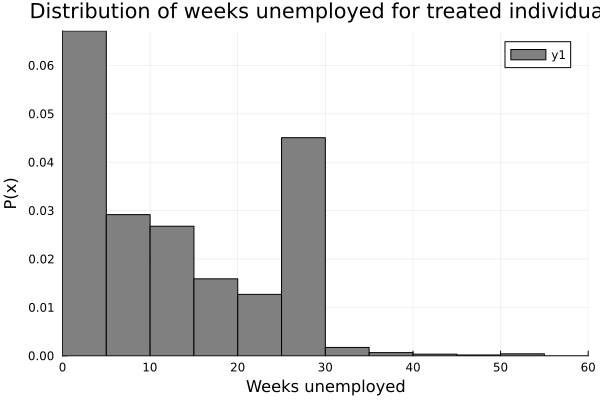

In [188]:

histogram(treatmat, bins=15, normalize=:pdf, color=:gray)
xlims!(0,60)
title!("Distribution of weeks unemployed for treated individuals")
xlabel!("Weeks unemployed")
ylabel!("P(x)")

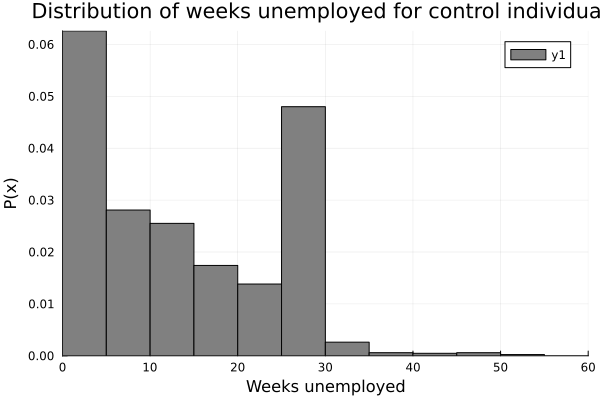

In [187]:

histogram(notreatmat, bins=15, normalize=:pdf, color=:gray)
xlims!(0,60)
title!("Distribution of weeks unemployed for control individuals")
xlabel!("Weeks unemployed")
ylabel!("P(x)")

1 Classical 2-Sample Approach (CL)

In [132]:
alpha=0.05
# Calculate the t-statistic and p-value
p_value = pvalue(UnequalVarianceTTest(vec(treatmat), vec(notreatmat)))

reject_H0 = p_value < alpha
alpha, p_value, reject_H0

 


(0.05, 0.009632230226561412, true)

In [148]:
ols_cl = lm(@formula(log(inuidur1) ~ T2), penn)

table1 = regtable( "No adjustment model" => ols_cl)  
#coefic=coef(ols_cl)

            | No adjustment model 
            |         (1)         
----------------------------------
(Intercept) |            2.057*** 
            |             (0.021) 
         T2 |            -0.079** 
            |             (0.032) 
----------------------------------
          N |               5,782 
      $R^2$ |               0.001 


2 Classical Linear Regression Adjustment (CRA)

In [136]:
reg2 = @formula(log(inuidur1) ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg2 = apply_schema(reg2, schema(reg2, penn))

ols_cra = lm(reg2, penn)
table2 = regtable("CRA model" => ols_cra)

                   | CRA model 
                   |    (1)    
-------------------------------
       (Intercept) |  2.447*** 
                   |   (0.381) 
                T2 |  -0.071** 
                   |   (0.032) 
            female | -0.943*** 
                   |   (0.314) 
             black | -0.508*** 
                   |   (0.146) 
           othrace |    -0.039 
                   |   (1.140) 
          dep: 1.0 |     0.280 
                   |   (0.451) 
          dep: 2.0 |     0.168 
                   |   (0.394) 
                q2 |     0.027 
                   |   (0.385) 
                q3 |    -0.354 
                   |   (0.384) 
                q4 |    -0.338 
                   |   (0.384) 
                q5 |    -0.178 
                   |   (0.383) 
                q6 |    -0.446 
                   |   (0.381) 
           agelt35 |    -0.326 
                   |   (0.326) 
           agegt54 |    -0.155 
                   |   (0.580) 
        

3 Interactive Regression Adjustment (IRA)

In [139]:
# demean function
function desv_mean(a)
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    return M
end    
reg1 = @formula(T2 ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg1 = apply_schema(reg1, schema(reg1, penn))
# Matrix Model & demean
X = StatsModels.modelmatrix(reg1.rhs,penn)
X = desv_mean(X) # matrix format 

5782×119 Matrix{Float64}:
 -0.400726  -0.118817  -0.00518852  -0.116569  …  -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852   0.883431  …   0.945002   -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569  …  -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0

In [142]:
Y = select(penn, [:inuidur1,:T2]) # select inuidur1 y T2

X = DataFrame(hcat(X, Matrix(select(penn, [:T2])).*X))  # Joint X, (T2*X)

base = hcat(Y, X) # Joint inuidur1, T2, X y (T2*X)

base.inuidur1 = log.(base.inuidur1)  # log(inuidur1)

terms = term.(names(base)) # term.() let us to get all variables as objects

#interactive regression model

ols_ira  = lm(terms[1] ~ sum(terms[2:end]), base)


table3 = regtable("Interactive model" => ols_ira)

#terms[1] : select first variable. In this case, oucome of interest 
#sum(terms[2:end]) : independent variables as regresors in the linear regression   

            | Interactive model 
            |        (1)        
--------------------------------
(Intercept) |          2.057*** 
            |           (0.021) 
         T2 |          -0.072** 
            |           (0.032) 
         x1 |            -0.666 
            |           (0.445) 
         x2 |         -0.863*** 
            |           (0.270) 
         x3 |            -1.735 
            |           (2.173) 
         x4 |             0.036 
            |           (0.685) 
         x5 |             0.212 
            |           (0.497) 
         x6 |            -0.255 
            |           (0.527) 
         x7 |            -0.621 
            |           (0.526) 
         x8 |            -0.480 
            |           (0.526) 
         x9 |            -0.372 
            |           (0.524) 
        x10 |            -0.677 
            |           (0.521) 
        x11 |            -0.678 
            |           (0.435) 
        x12 |            -0.304 
          

# Plot coefficients 

In [180]:
#T2*female      1
#T2*black       2
#T2*agelt35     4
#T2*factor(dep)1  11
# 23 var:
# Intercept, T2, 120INTERACTIONS ...,T2*female,T2*black, ... T2*INTERACTION
# 1        ,  2,         ...     122,  123    ,   124  ,    ...          240
#coef(ols_ira)[1]     

2.056525896150369

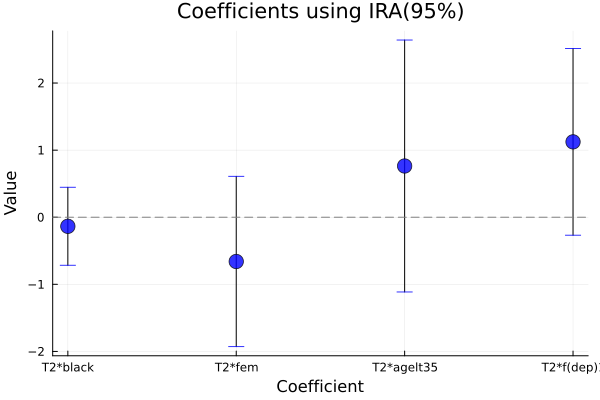

In [183]:


# Extraer los coeficientes para sex y los errores estándar de las últimas dos regresiones
coefs = Dict("T2*fem" => coef(ols_ira)[122],
             "T2*black" => coef(ols_ira)[123],
             "T2*agelt35" => coef(ols_ira)[125],
             "T2*f(dep)1" => coef(ols_ira)[132])  

ses = Dict("T2*fem" => stderror(ols_ira)[122],
             "T2*black" => stderror(ols_ira)[123],
             "T2*agelt35" => stderror(ols_ira)[125],
             "T2*f(dep)1" => stderror(ols_ira)[132]) 

# Gráfico de dispersión con barras de error
scatter_plot = scatter(coefs, yerr=1.96 .* collect(values(ses)), legend=false, 
    xlabel="Coefficient", ylabel="Value", title="Coefficients using IRA(95%)",
    markershape=:circle, markercolor=:blue, markerstrokecolor=:black,
    markersize=8, markeralpha=0.8)

# Línea horizontal en y=0
hline!(scatter_plot, [0], color="gray", linestyle=:dash)


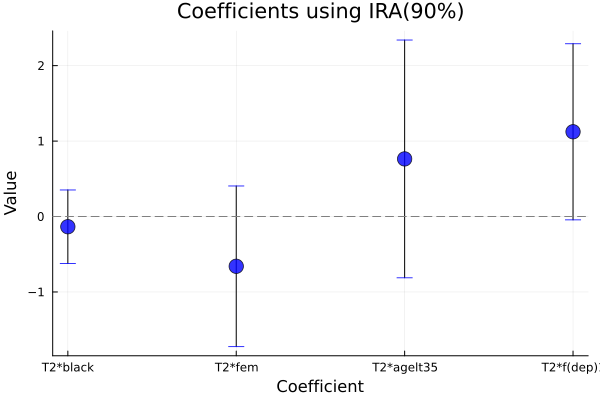

In [182]:


# Extraer los coeficientes para sex y los errores estándar de las últimas dos regresiones
coefs = Dict("T2*fem" => coef(ols_ira)[122],
             "T2*black" => coef(ols_ira)[123],
             "T2*agelt35" => coef(ols_ira)[125],
             "T2*f(dep)1" => coef(ols_ira)[132])  

ses = Dict("T2*fem" => stderror(ols_ira)[122],
             "T2*black" => stderror(ols_ira)[123],
             "T2*agelt35" => stderror(ols_ira)[125],
             "T2*f(dep)1" => stderror(ols_ira)[132]) 

# Gráfico de dispersión con barras de error
scatter_plot = scatter(coefs, yerr=1.645 .* collect(values(ses)), legend=false, 
    xlabel="Coefficient", ylabel="Value", title="Coefficients using IRA(90%)",
    markershape=:circle, markercolor=:blue, markerstrokecolor=:black,
    markersize=8, markeralpha=0.8)

# Línea horizontal en y=0
hline!(scatter_plot, [0], color="gray", linestyle=:dash)


No Significant Interaction Effects:

Our analysis found no statistically significant interaction effects between the incentive program and other factors at the 90% or 95% confidence level. This suggests there's no evidence of heterogeneity (variation in effects) within subgroups defined by these factors.

Marginally Positive Effect for Dependents = 1:

However, there's a trend worth mentioning. Individuals with one dependent (e.g., one child) showed a marginally positive (but not statistically significant) effect. This could tentatively suggest they might be slightly more likely to remain unemployed when receiving the incentive.

Similar Trend for Under 35:

A similar trend was observed for individuals under 35.

Negative Estimates for Women and Black People:

Interestingly, women and Black people displayed negative point estimates. This means they might be more inclined to seek employment sooner upon receiving the incentive program's benefits.

Key Points:

No statistically significant interaction effects were found between the incentive program and other factors.
Individuals with one dependent and those under 35 showed a slight (not significant) tendency to remain unemployed longer with the incentive.
Women and Black people seemed more likely to seek employment sooner when offered the incentive.